# Basic Derivatives


In [4]:
import numpy as np
import matplotlib.pyplot as plt

STRIKE = 100


The primary market is where securities are created an initially sold from the issuer to market particpants, these instruments are then traded between market participants on the secondary market.

#### Derivatives 

An (call/put) options contract gives the option to purchase/sell an asset at the strike price at a given time.

The holder of forwards/futures contract has an obligation to purchase/sell an asset at the strike price at a given time.

#### Difference between a forwards and futures contract

Forwards contracts are traded over-the-counter (OTC) whereas futures contracts are traded on exchanges, therefore futures have a relatively high liquidity whereas forwards have a relatively low liquidity. As the exchange acts as both a mediator and faciliator between the buyer and seller both parties pay a cost to the exchange. Forward contracts are self-regulated therefore changes of default are non-zero. 

Futures contracts are settled on a daily basis, whereas forwards contracts are settled at maturity.

#### Example of futures contract

A corn producer might want to engage in a call option which gives them the right to sell corn at a fixed price. This protects them from fluctations down in the price of corn at harvest season. A corn user, such as a cereal company may wish to sell this option as it mitigates their risk and ensures they source their production at a predictable cost. If the cost of corn is higher than the strike of the contract then the farmer loses out on some profits in selling the corn specified in the contract but the high price of their other owned corn can mitigate this. The company will be paying a higher price to source their ingredients but the corn recieved at the reduced price under the contract will help mitigate this. Conversely if corn is selling cheap at the maturity date, the farmer can gain back some losses under the corn sold in the contract and the company can afford the greater price of the corn specified in the contract due to their profits from corn price being lower than expected.

In this scenario the farmer is long the put option and the company is short the call option.

#### Futures Contracts

In order to eliminate counter party risk on secondary markets, as a market participant you are required to have a clearer who will cover your positions. If you enter a futures contract the clearer will require you to post a margin, you will recieve some interest on your money tied up in margins but this is still inefficient capital allocation. This margin will be used to payout an losses due to poor speculation. In this case, the clearer will `margin call' the holder of the contract to post more margin. In the event you cannot the clearer has the right to liquidate your other assets to cover your margin obligations. 

#### Pricing Options Contracts

An options contract is determined by two fixed parameters, the strike price and the expiry time. The value of an options contract is determined by two variables, the current underlying instrument and the time to expiry. Other fixed parameters such as the interest rate will affect the contract price too.

The worth of an options contract is determined by its intrisic and extrisic values. The intrinsic value is the difference between the strike and the current value of the underlying - this is the above payoff functions. The extrinsic value is the value of the optionality and the potential value of the contract due to movements of the underlying between the current time and expiration.

#### Put-Call Parity

Assuming no-arbitrage, there is a relation between the following quantities:

- $C$ = Price of the European call option
- $P$ = Price of the European put option
- $S$ = Current stock price
- $X$ = Strike price of the options
- $r$ = Risk-free interest rate (annual rate, compounded continuously)
- $t$ = Time to expiration (in years)

The put-call parity is given by the following relation:
$$ C - P = S - Xe^{-rt} $$

That is, to long the call option and short the put is equivalent to being long the underlying asset and short the cash value. To see why this is the case we consider the following table:

| Holding | Worth today (t)       | Worth at expiry (T) |
| :-----: | :-------------:       | :-----------------: |
| Call    |   $C$                   | $\max(S(T) - E, 0)$    |
| -Put    |   $-P$                  | $-\max(E - S(T), 0)$   |
| Asset   |  $S(t)$                 | $S(T)$                |
| -Cash   | $-Ee^{-r(T-t)}$          | $-E$                   |
| Total   | $C - P + S(t) -Ee^{-r(T-t)}$ | $0$  |


As we know the combined value of this position will be $0$ at expiry, if the current value of the position is non-zero then there exists an arbitrage opportunity by taking the long or short position of the left-hand side, depending if the discrepancy is positive or negative.

This is an application of `The Law of One Price', which states if the value of two portfolios $P_{1}, P_{2}$ are equal at time $t_{1}$ with probability $1$ then they must be equal at all times $t_{0} < t_{1}$. If this is not true their exists arbitrage opportunities. Mathematically,

$$\mathbb{P}(P_{0}(T) = P_{1}(T)) = 1 \implies P_{0}(t) = P_{1}(t).$$

#### Rough calculations
If $C - P > S - Xe^{-rt}$ then, under the put call parity, short the overvalued left-hand side and long the right-hand side. This corresponds to shorting the call option and buying the put option, buy the underlying and lend the cash value.

The payout of these options is given by:

In [5]:
def call_payoff(underlying):
    return np.maximum(underlying - STRIKE, 0)

def put_payoff(underlying):
    return np.maximum(STRIKE - underlying, 0)

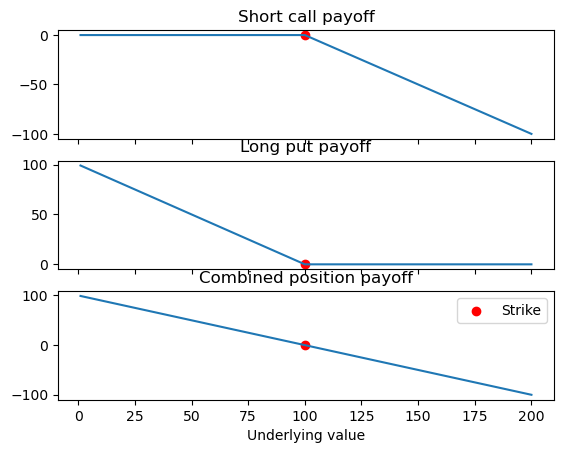

In [10]:
fig, axs = plt.subplots(3, 1, sharex=True)
underlying = np.linspace(1, 200, 200)
axs[0].plot(underlying, -call_payoff(underlying))
axs[0].set_title("Short call payoff")
axs[1].plot(underlying, put_payoff(underlying))
axs[1].set_title("Long put payoff")
axs[2].plot(underlying, put_payoff(underlying) - call_payoff(underlying))
axs[2].set_title("Combined position payoff")
axs[2].set_xlabel("Underlying value")
axs[0].scatter(100, 0, label="Strike", c='r')
axs[1].scatter(100, 0, label="Strike", c='r')
axs[2].scatter(100, 0, label="Strike", c='r')
axs[2].legend()
plt.show(fig)

If the price of the underlying is greater than the strike at expiry then the short contract we sold will be exercised, we can transfer the asset for which we were long to cover this. Meaning we lose $X - S$